[View in Colaboratory](https://colab.research.google.com/github/Nourahussein/Plant-seedling-classification/blob/master/FINAL_seedling.ipynb)

**step1:** Download data from [kaggle](https://www.kaggle.com/c/plant-seedlings-classification)  in train.zip file 

**step 2 :**  extract files and sse its contents

In [0]:
url="https://storage.googleapis.com/kaggle-competitions-data/kaggle/7880/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528430569&Signature=iZBYzxd3lD3nQvZHXb%2BfjVvLNctOqVhminajwo4j5cizAelb80wLXwIHRjrL9cdMaxgQ%2FZ%2B4GfPVvUesy6leikbJa%2B0XajOXSm62xQ7bD9QvdSnOFW8RAnmIIr4Ca6AqUsYIZNI4BpaPIuYTvvtIRP4fS5o4nhxvAy9CIH1Xt1e9KhTjPjmE3FNHQoqdopuF9GPIQNk%2BbSJvECVs4vTrKb67r3c7%2BoanvkecmD%2F3yf1nXM89NCTmpb8efw%2B%2BH6%2BnxARfGE%2BMy144dgdp7tzSZiTcc2lJyf9bCTgxoWVuKRA%2FxUEM0x9gyaMhJLlga6UmM4difWs4ilMKzvWnFW9Zpw%3D%3D"

In [13]:
from urllib import request
file_name = "train.zip"
request.urlretrieve(url, file_name)

('train.zip', <http.client.HTTPMessage at 0x7f49edd260f0>)

In [14]:
import zipfile as zf
train_zip = zf.ZipFile(file_name)
train_zip.extractall()
!ls

datalab  train	train.zip


In [3]:
#see contents of train file
!ls train


Black-grass  Common Chickweed  Loose Silky-bent   Shepherds Purse
Charlock     Common wheat      Maize		  Small-flowered Cranesbill
Cleavers     Fat Hen	       Scentless Mayweed  Sugar beet


In [4]:
!ls train/Maize

006196e1c.png  30d126c24.png  5dfa39111.png  905f9f385.png  cccbcc365.png
0086c28b2.png  30f76315b.png  5fdb1dccf.png  907817b91.png  cd2b68ba2.png
00a18f05e.png  31d92d77d.png  606d5c83f.png  919e154c2.png  cdcb0f735.png
0150b5b7e.png  3213aec10.png  61c7d55b0.png  91a9d5b9d.png  ce76cb1e5.png
01642cae8.png  34c035273.png  6219b36db.png  92c06eaca.png  cf7b09a39.png
0184ec53f.png  362eee504.png  62a1614a2.png  96d476790.png  d3963a326.png
030e7f9ef.png  365ff4533.png  642e055ee.png  97da6a579.png  d3cf21397.png
0419f5bbc.png  37156c661.png  648ddc558.png  982130e94.png  d8ae9a82b.png
051ea51d0.png  388317d6c.png  6495c3f49.png  988113525.png  d99129a77.png
06e1ee6e1.png  3a6d4d007.png  649b7af36.png  9977e50bc.png  dc7a7bdeb.png
084d21b80.png  3ac5a3def.png  64a6f6f65.png  9d1e59e00.png  e17f5daf0.png
0bdaf1d8f.png  3ad5d809c.png  65b4ebc41.png  9d3514473.png  e30accd2f.png
0cd0d9b8c.png  3b6bc2e4c.png  65ba0f497.png  9d588ace5.png  e364ace75.png
0f16cf10a.png  3cb4f2c65.png  665b921f

***save zip file in drive to be used in next time using its id ***

In [0]:
#change dirctory 
#import os 
#os.chdir("train")
#cwd = os.getcwd()


In [0]:
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns


In [0]:
#save the path into variable to use it easily next times.
TRAin_DATA_FOLDER= "train"

**Read images**

In [0]:
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None:
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)
        
        

In [8]:
len(images)
print(missing)

0


**see some inputs of images **

**Normlizing png images**

In [0]:
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res
#resized=[]
#for image in images:
#  ressized= resize_images(images[image])

In [0]:
images = [resize_images(img) for img in images]

In [11]:
images[0].shape

(256, 256, 3)

In [12]:
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))
        
  


images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Cleavers images is  -> 287
number of Charlock images is  -> 390
number of Common wheat images is  -> 221
number of Fat Hen images is  -> 475
number of Black-grass images is  -> 263
number of Common Chickweed images is  -> 611
number of Sugar beet images is  -> 385
number of Small-flowered Cranesbill images is  -> 496
number of Scentless Mayweed images is  -> 516
number of Shepherds Purse images is  -> 231
number of Loose Silky-bent images is  -> 654
number of Maize images is  -> 221


Text(0.5,0.98,'Categorical Plotting')

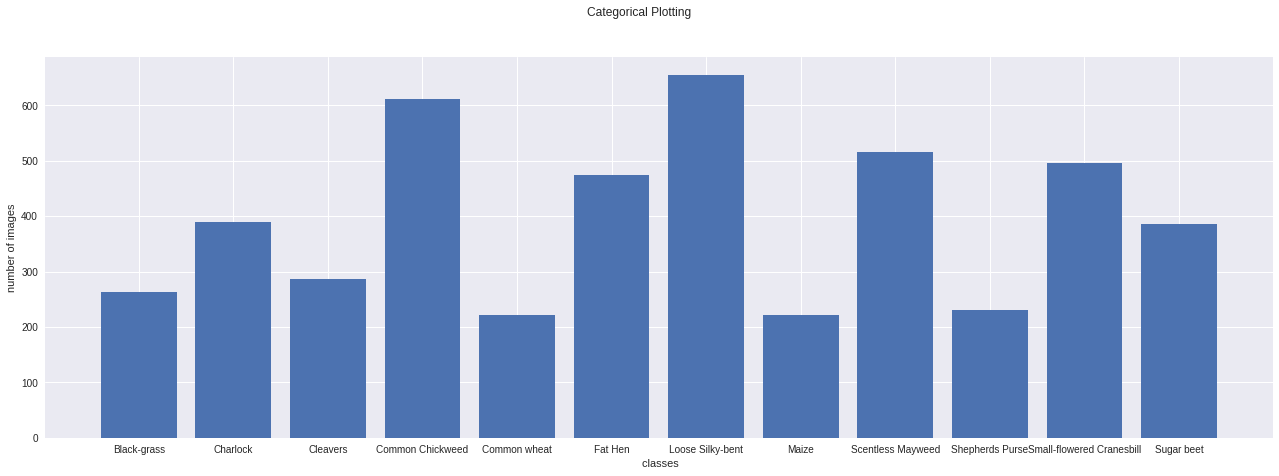

In [13]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

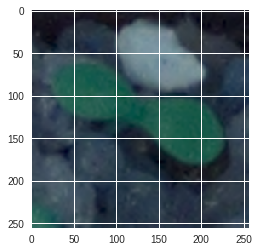

In [14]:
plt.imshow(images[50])


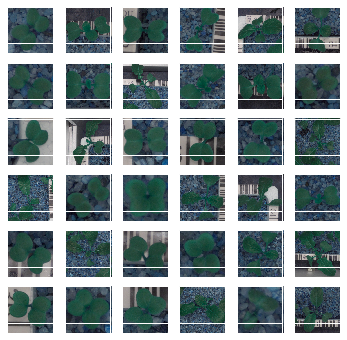

In [15]:
def plot_for_class(label):
    nb_rows = 6
    nb_cols = 6
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Charlock")

In [0]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp



In [17]:
type(images[0])

numpy.ndarray

In [0]:
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

In [0]:
for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue
      
    
  

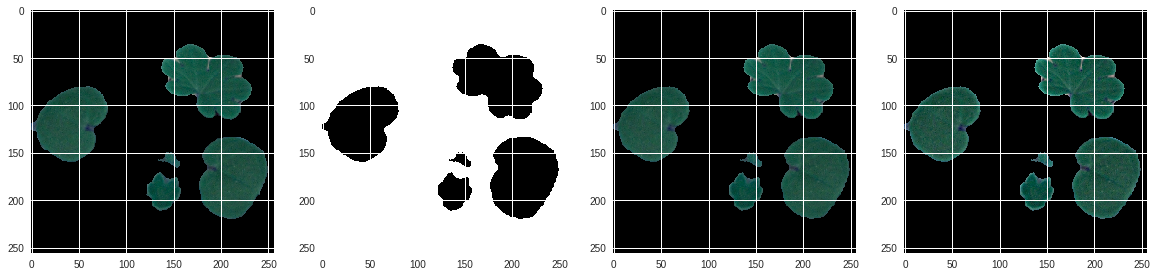

In [61]:
image = images[classes == "Small-flowered Cranesbill"][40]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

**Split  data into train and test**


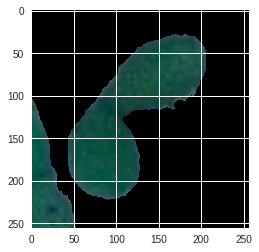

In [21]:
plt.imshow(images[0])

In [22]:
images.shape

(4750, 256, 256, 3)

In [0]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [24]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)

In [26]:
X_train.shape


(3325, 256, 256, 3)

In [0]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [28]:
print(X_test.shape)
print(X_val.shape)

(712, 256, 256, 3)
(713, 256, 256, 3)


In [73]:

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 64)        0         
__________

In [0]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [75]:
model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)

Train on 3325 samples, validate on 713 samples
Epoch 1/50
3325/3325 [==============================] - 50s 15ms/step - loss: 3.2578 - acc: 0.1311 - val_loss: 2.4551 - val_acc: 0.1178
Epoch 2/50
3325/3325 [==============================] - 49s 15ms/step - loss: 2.3246 - acc: 0.2054 - val_loss: 2.1702 - val_acc: 0.2328
Epoch 3/50
3325/3325 [==============================] - 49s 15ms/step - loss: 2.0613 - acc: 0.2553 - val_loss: 2.1191 - val_acc: 0.2412
Epoch 4/50
 736/3325 [=====>........................] - ETA: 34s - loss: 2.1286 - acc: 0.2704

3325/3325 [==============================] - 49s 15ms/step - loss: 2.0096 - acc: 0.2830 - val_loss: 2.0681 - val_acc: 0.2805
Epoch 5/50
3325/3325 [==============================] - 49s 15ms/step - loss: 1.8954 - acc: 0.3029 - val_loss: 1.8167 - val_acc: 0.3562
Epoch 6/50
3325/3325 [==============================] - 49s 15ms/step - loss: 1.7772 - acc: 0.3444 - val_loss: 1.7002 - val_acc: 0.3590
Epoch 7/50
2144/3325 [==================>...........] - ETA: 15s - loss: 1.7058 - acc: 0.3937

3325/3325 [==============================] - 49s 15ms/step - loss: 1.6790 - acc: 0.4000 - val_loss: 1.7425 - val_acc: 0.3899
Epoch 8/50
3325/3325 [==============================] - 49s 15ms/step - loss: 1.5608 - acc: 0.4361 - val_loss: 1.5060 - val_acc: 0.4895
Epoch 9/50
3325/3325 [==============================] - 49s 15ms/step - loss: 1.4425 - acc: 0.4947 - val_loss: 1.3618 - val_acc: 0.5596
Epoch 10/50
2368/3325 [====================>.........] - ETA: 13s - loss: 1.3968 - acc: 0.5363

3325/3325 [==============================] - 49s 15ms/step - loss: 1.3705 - acc: 0.5353 - val_loss: 1.3255 - val_acc: 0.5975
Epoch 11/50
3325/3325 [==============================] - 49s 15ms/step - loss: 1.2128 - acc: 0.5802 - val_loss: 1.2263 - val_acc: 0.6283
Epoch 12/50
3325/3325 [==============================] - 49s 15ms/step - loss: 1.1486 - acc: 0.6072 - val_loss: 1.1305 - val_acc: 0.6424
Epoch 13/50
2368/3325 [====================>.........] - ETA: 12s - loss: 1.0763 - acc: 0.6258

3325/3325 [==============================] - 49s 15ms/step - loss: 1.0725 - acc: 0.6313 - val_loss: 1.3030 - val_acc: 0.5806
Epoch 14/50
3325/3325 [==============================] - 49s 15ms/step - loss: 1.0072 - acc: 0.6577 - val_loss: 0.9907 - val_acc: 0.6985
Epoch 15/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.9507 - acc: 0.6695 - val_loss: 0.9143 - val_acc: 0.7041
Epoch 16/50
2368/3325 [====================>.........] - ETA: 13s - loss: 0.8988 - acc: 0.6879

3325/3325 [==============================] - 49s 15ms/step - loss: 0.9097 - acc: 0.6860 - val_loss: 0.9877 - val_acc: 0.6550
Epoch 17/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.8791 - acc: 0.7002 - val_loss: 1.1353 - val_acc: 0.6241
Epoch 18/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.8370 - acc: 0.7077 - val_loss: 0.8773 - val_acc: 0.7055
Epoch 19/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.8435 - acc: 0.7230

3325/3325 [==============================] - 49s 15ms/step - loss: 0.8141 - acc: 0.7233 - val_loss: 0.8208 - val_acc: 0.7195
Epoch 20/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.7834 - acc: 0.7365 - val_loss: 0.8340 - val_acc: 0.7335
Epoch 21/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.7429 - acc: 0.7353 - val_loss: 1.0992 - val_acc: 0.6101
Epoch 22/50
2368/3325 [====================>.........] - ETA: 13s - loss: 0.7155 - acc: 0.7580

3325/3325 [==============================] - 49s 15ms/step - loss: 0.7127 - acc: 0.7591 - val_loss: 0.8345 - val_acc: 0.7069
Epoch 23/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.6792 - acc: 0.7615 - val_loss: 0.8410 - val_acc: 0.7321
Epoch 24/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.6826 - acc: 0.7594 - val_loss: 0.7078 - val_acc: 0.7602
Epoch 25/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.6803 - acc: 0.7703

3325/3325 [==============================] - 49s 15ms/step - loss: 0.6564 - acc: 0.7774 - val_loss: 0.7620 - val_acc: 0.7546
Epoch 26/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.6413 - acc: 0.7759 - val_loss: 0.8806 - val_acc: 0.6999
Epoch 27/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.6367 - acc: 0.7829 - val_loss: 0.7135 - val_acc: 0.7686
Epoch 28/50
2368/3325 [====================>.........] - ETA: 13s - loss: 0.6244 - acc: 0.7867

3325/3325 [==============================] - 49s 15ms/step - loss: 0.6228 - acc: 0.7871 - val_loss: 0.7792 - val_acc: 0.7307
Epoch 29/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.5736 - acc: 0.8051 - val_loss: 0.6282 - val_acc: 0.7826
Epoch 30/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.5906 - acc: 0.7937 - val_loss: 0.6289 - val_acc: 0.7882
Epoch 31/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.6016 - acc: 0.7998

3325/3325 [==============================] - 49s 15ms/step - loss: 0.5789 - acc: 0.8087 - val_loss: 0.6786 - val_acc: 0.7714
Epoch 32/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.5703 - acc: 0.8027 - val_loss: 0.6708 - val_acc: 0.7910
Epoch 33/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.5783 - acc: 0.8006 - val_loss: 0.5801 - val_acc: 0.7938
Epoch 34/50
2368/3325 [====================>.........] - ETA: 13s - loss: 0.5339 - acc: 0.8277

3325/3325 [==============================] - 49s 15ms/step - loss: 0.5556 - acc: 0.8198 - val_loss: 0.7679 - val_acc: 0.7419
Epoch 35/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.5410 - acc: 0.8174 - val_loss: 0.7167 - val_acc: 0.7938
Epoch 36/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.5408 - acc: 0.8096 - val_loss: 0.6739 - val_acc: 0.7616
Epoch 37/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.5830 - acc: 0.8091

3325/3325 [==============================] - 49s 15ms/step - loss: 0.5719 - acc: 0.8129 - val_loss: 0.6404 - val_acc: 0.7952
Epoch 38/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.5179 - acc: 0.8202 - val_loss: 0.9458 - val_acc: 0.6578
Epoch 39/50
3325/3325 [==============================] - 49s 15ms/step - loss: 0.5529 - acc: 0.8105 - val_loss: 0.6610 - val_acc: 0.7728
Epoch 40/50
1632/3325 [=============>................] - ETA: 22s - loss: 0.5011 - acc: 0.8290

KeyboardInterrupt: ignored

In [76]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5345413610339165
Test accuracy: 0.8623595612772396


In [77]:
X_test.shape

(712, 256, 256, 3)

In [0]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 38

In [0]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [87]:
X_train, X_test, y_train, y_test
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 71s - loss: 0.3259 - acc: 0.8911 - val_loss: 0.6286 - val_acc: 0.7742
Epoch 2/30
 - 70s - loss: 0.3050 - acc: 0.8950 - val_loss: 0.6917 - val_acc: 0.7742
Epoch 3/30
 - 70s - loss: 0.3234 - acc: 0.8893 - val_loss: 0.4887 - val_acc: 0.8247
Epoch 4/30
 - 70s - loss: 0.3182 - acc: 0.8878 - val_loss: 0.5244 - val_acc: 0.8065
Epoch 5/30
 - 70s - loss: 0.3039 - acc: 0.8999 - val_loss: 0.5934 - val_acc: 0.7784
Epoch 6/30
 - 70s - loss: 0.3300 - acc: 0.8835 - val_loss: 0.5525 - val_acc: 0.8022

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 7/30
 - 69s - loss: 0.2756 - acc: 0.9047 - val_loss: 0.5517 - val_acc: 0.8163
Epoch 8/30
 - 69s - loss: 0.2750 - acc: 0.9044 - val_loss: 0.5407 - val_acc: 0.8036
Epoch 9/30
 - 68s - loss: 0.2610 - acc: 0.9044 - val_loss: 0.5268 - val_acc: 0.8149

Epoch 00009: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 10/30
 - 68s - loss: 0.2519 - acc: 0.9068 - val_loss: 0.5396 - val_acc: 0.816

In [92]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = None)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.44311273432849496
Test accuracy: 0.8525280898876404


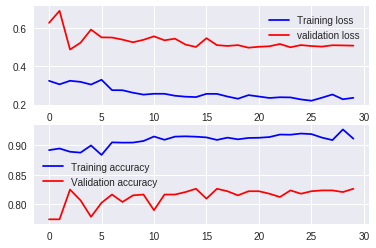

In [88]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
#prediction = model.predict(X_test)

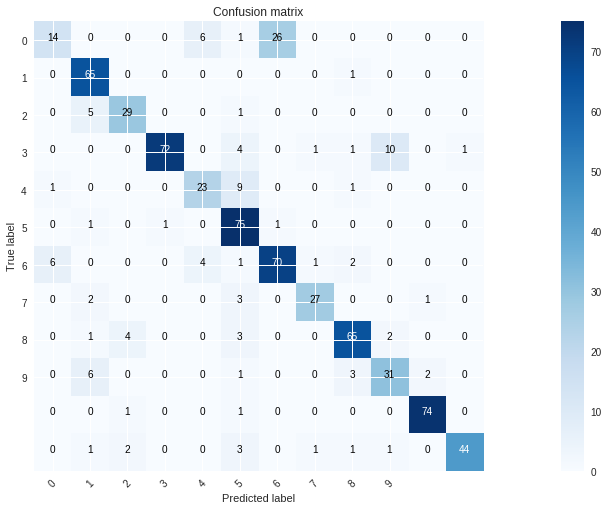

In [89]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [0]:
def ResNet50_Predict_Breed(img_path):
    # HERE xtract bottleneck features
    # HERE obtain predicted vector
    # HERE return dog breed that is predicted by MY model
    return dog_names[np.argmax(PredictedVector)]
  
  

In [109]:
PredictedVector = model.predict_classes(X_test)
print(PredictedVector)

[ 8  0  2  6  8  1  2  5 10 10  6 10  5  9 11 10  1  6  6 11  8  5 10  8
  8  8  4 10  6  2  6 11  6  6  8  4  5  4  6  3  5  9  6  8  2 10  5  3
  8  9  8  5  2  9  5  6  4  3  4 11 11  8  1  6  6  0  8  3  4  8  4  6
 10  5  9  6  7  7 11  8  2  6  7  1 10 11  8  5  3  9  8  6  5  4  6  8
  5  9  6  8  2  0  1  7  6  8  2  4 10  6  1 10  5  6  5  5  4  9  9  5
  3  2  2  2 10  3  8  3  8  6 11  6  5  2  6  4  8  1  3  3  1  0  1  0
  5  8  9  9  6  6  5  6 10  6  3  7  9  5 11  5 10  7  6  2  4  1  3 10
  2  5 10  8  2  6  4 11  5  2  3  8  5  5  6  4  6  6  3  9  7  6  1  8
  0  9 10  5  5  9  3 10  5  3  3  0  3 10  5  7  4  6  6  7  9  5  1  5
  3  0  8  5  8 10 11 11  4  7  7  1  6  5  8  6  5  6  6  8  8  3 10  2
  3  5  6  6  0 10  5  1  5  3  5  5 11  3 10  3  9  1  4  3  0  6 10  9
  3  6  3  8  4  3  5  2  3  7 10  9  8  0  6 11 10  0  6  2  8  4  5  4
  8  5  3  6 10  3  6  4  5  5  3  6 10  6  6  2  6  9  8  8  8  1  2  9
 10  3  3  6  6  3  8  1  2 11  6  3 11 10  8  3  1